<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-2-Regression-1/blob/master/Stephen_Sinclair_making_forecasts_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Regression 1_

# Making Forecasts

#### Objectives
- acquire time series data
- begin with baselines for time series
- use Prophet to forecast time series

## Acquire time series data



You can use [Wikimedia Foundation's pageviews tool](https://tools.wmflabs.org/pageviews/) to explore and download Wikipedia pageviews data.

Or, you can try a stretch goal — use the Wikimedia Pageviews API to get data:

- Get good at learning new things by googling and reading documentation. Jake Vander Plas calls this ["the real world bootcamp"](https://twitter.com/jakevdp/status/648593367786323968).
- To learn how to get data from an API, follow along with the [Requests library quickstart](https://2.python-requests.org/en/master/user/quickstart/), or [_Automate the Boring Stuff with Python_, Chapter 14](https://automatetheboringstuff.com/chapter14/) by Al Swiegart.
- Then, refer to the [Wikipedia Pageviews API quickstart](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews#Quick_start) and [documentation](https://wikimedia.org/api/rest_v1/#/Pageviews%20data).

If you're using Colab and you downloaded a CSV file, you can follow [this post by Lambda School Data Science student](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) to help you load your data.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving pageviews-20180602-20190524.csv to pageviews-20180602-20190524.csv


{'pageviews-20180602-20190524.csv': b'Date,"Alexandria Ocasio-Cortez"\n2018-06-02,7\n2018-06-03,7\n2018-06-04,7\n2018-06-05,9\n2018-06-06,14\n2018-06-07,3\n2018-06-08,2\n2018-06-09,10\n2018-06-10,10\n2018-06-11,7\n2018-06-12,20\n2018-06-13,32\n2018-06-14,12\n2018-06-15,28\n2018-06-16,26\n2018-06-17,24\n2018-06-18,34\n2018-06-19,67\n2018-06-20,32\n2018-06-21,18\n2018-06-22,17\n2018-06-23,18\n2018-06-24,28\n2018-06-25,37\n2018-06-26,155\n2018-06-27,181780\n2018-06-28,133285\n2018-06-29,83014\n2018-06-30,69636\n2018-07-01,71023\n2018-07-02,65844\n2018-07-03,45545\n2018-07-04,29636\n2018-07-05,20601\n2018-07-06,16173\n2018-07-07,16683\n2018-07-08,12069\n2018-07-09,10987\n2018-07-10,9086\n2018-07-11,13287\n2018-07-12,11580\n2018-07-13,9794\n2018-07-14,6789\n2018-07-15,6046\n2018-07-16,11815\n2018-07-17,19922\n2018-07-18,20774\n2018-07-19,16199\n2018-07-20,14500\n2018-07-21,22152\n2018-07-22,23510\n2018-07-23,17239\n2018-07-24,23408\n2018-07-25,25059\n2018-07-26,21312\n2018-07-27,21684\n2018

In [3]:
!ls

pageviews-20180602-20190524.csv  sample_data


In [74]:
df = pd.read_csv('pageviews-20180602-20190524.csv')
df.head()

,Date,Alexandria Ocasio-Cortez
0,2018-06-02,7
1,2018-06-03,7
2,2018-06-04,7
3,2018-06-05,9
4,2018-06-06,14


In [59]:
df.tail()

,Date,Alexandria Ocasio-Cortez
352,2019-05-20,17731
353,2019-05-21,17370
354,2019-05-22,18682
355,2019-05-23,17255
356,2019-05-24,18685


In [75]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Alexandria Ocasio-Cortez
Date,
2018-06-02,7
2018-06-03,7
2018-06-04,7
2018-06-05,9
2018-06-06,14


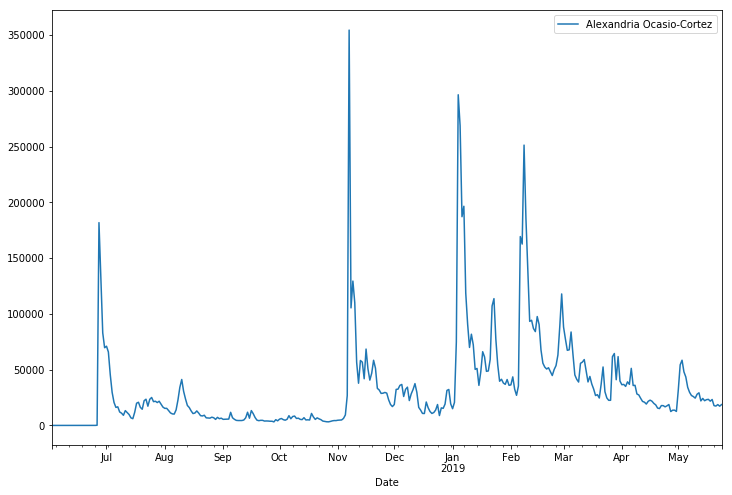

In [61]:
df.plot(figsize=(12,8))

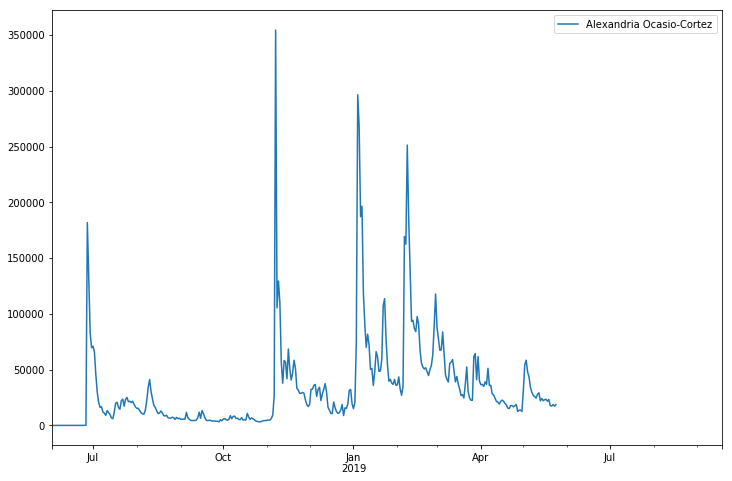

In [62]:
df = df.reindex(pd.date_range(start='2018-06-02', end='2019-09-18'))
df.plot(figsize=(12,8))

## Begin with baselines for time series


#### [Will Koehrsen:](https://twitter.com/koehrsen_will/status/1088863527778111488)

> One of the most important steps in a machine learning project is establishing a common sense baseline. If your model can't beat the baseline, then maybe you don't really need machine learning.

> A baseline for classification can be the most common class in the training dataset.

> A baseline for regression can be the mean of the training labels. 

> A baseline for time-series regressions can be the value from the previous timestep.

#### Rob Hyndman & George Athanasopoulos, [_Forecasting: Principles and Practice_, Chapter 3.1](https://otexts.com/fpp2/simple-methods.html), Some simple forecasting methods:

> Some forecasting methods are extremely simple and surprisingly effective. We will use the following methods as benchmarks throughout this book.

> **Average method:** the forecasts of all future values are equal to the average (or “mean”) of the historical data.

> **Naïve method:** we simply set all forecasts to be the value of the last observation. This method works remarkably well for many economic and financial time series.

> **Drift method:** This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.

> Sometimes one of these simple methods will be the best forecasting method available; but in many cases, these methods will serve as benchmarks rather than the method of choice. That is, any forecasting methods we develop will be compared to these simple methods to ensure that the new method is better than these simple alternatives. If not, the new method is not worth considering.

### Average method

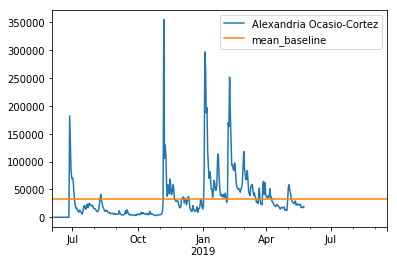

In [63]:
df['mean_baseline'] = df['Alexandria Ocasio-Cortez'].mean()
df.plot()

### Naive method (last observation)

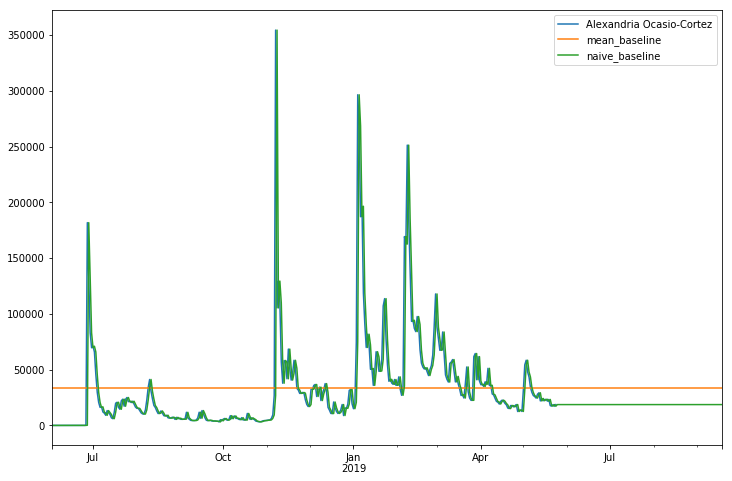

In [64]:
df['naive_baseline'] = df['Alexandria Ocasio-Cortez'].shift(1).ffill()
df.plot(figsize=(12,8))

### Drift method (draw line between first and last observation)

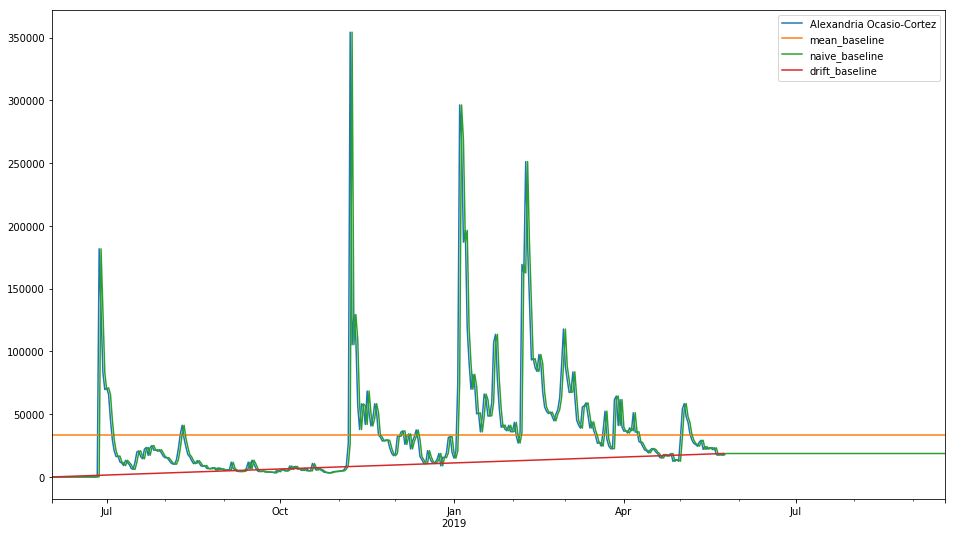

In [65]:
import numpy as np
df['drift_baseline'] = np.nan
df.loc['2018-06-02', 'drift_baseline'] = df.loc['2018-06-02', 'Alexandria Ocasio-Cortez']
df.loc['2019-05-24', 'drift_baseline'] = df.loc['2019-05-24', 'Alexandria Ocasio-Cortez']
df['drift_baseline'] = df['drift_baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));

## Use Prophet to forecast time series

We will follow the [Prophet Quick Start tutorial](https://facebook.github.io/prophet/docs/quick_start.html#python-api).

> The input to Prophet is always a dataframe with two columns: `ds` and `y`. The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The `y` column must be numeric, and represents the measurement we wish to forecast.

In [0]:
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Alexandria Ocasio-Cortez':'y'})

In [84]:
df_prophet.head()

,ds,y
0,2018-06-02,7
1,2018-06-03,7
2,2018-06-04,7
3,2018-06-05,9
4,2018-06-06,14


> We fit the model by instantiating a new `Prophet` object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

```
    from fbprophet import Prophet
    m = Prophet()
    m.fit(df)
```

In [85]:
from fbprophet import Prophet
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


> Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well.

```
    future = m.make_future_dataframe(periods=365)
    future.tail()
```

In [86]:
future = m.make_future_dataframe(periods=120)
future.tail()

,ds
472,2019-09-17
473,2019-09-18
474,2019-09-19
475,2019-09-20
476,2019-09-21


> The `predict` method will assign each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

```
    forecast = m.predict(future)
```

In [0]:
forecast = m.predict(future)

> You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

```
    fig1 = m.plot(forecast)
```

In [0]:
from matplotlib import pyplot as plt
from matplotlib.dates import (
        MonthLocator,
        num2date,
        AutoDateLocator,
        AutoDateFormatter,
    )
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [0]:
def plot(
    m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    title='Title', figsize=(16, 9)
):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        sns.set_style('darkgrid')
        fig = plt.figure(facecolor='w', figsize=figsize)
        fig.suptitle(title, y=.94, fontsize=28)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='red')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='red', alpha=0.2)
    # Specify formatting to workaround matplotlib issue #12925
    locator = AutoDateLocator(interval_multiples=False)
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    fig.tight_layout()
    plt.subplots_adjust(top=0.88)
    return fig

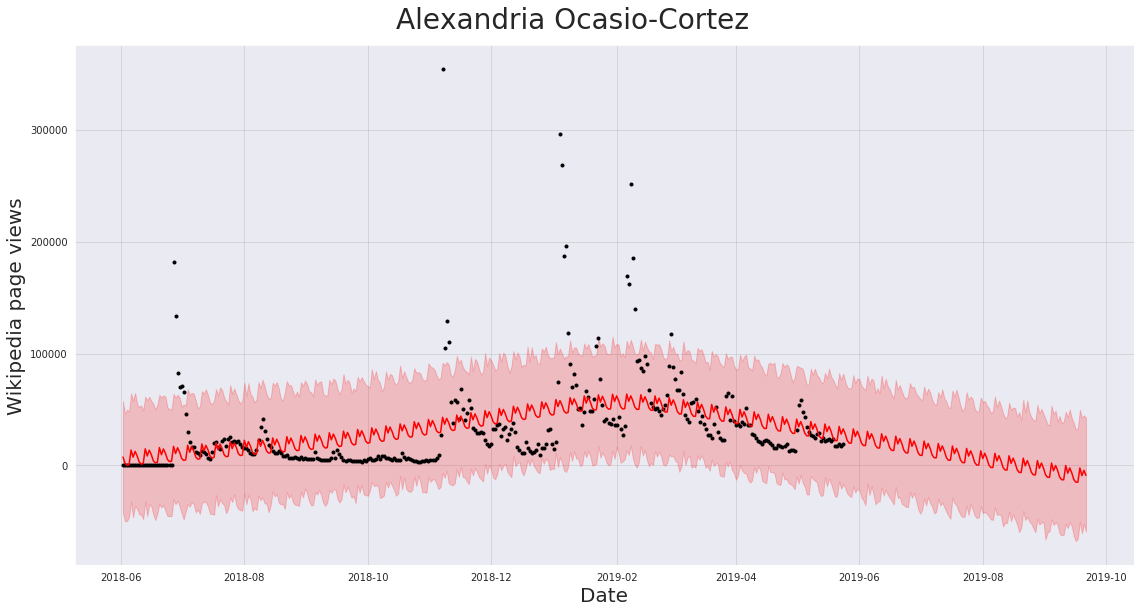

In [158]:
final_fig = plot(m, forecast, xlabel='Date', ylabel='Wikipedia page views', title='Alexandria Ocasio-Cortez')
plt.savefig('aoc.jpg')

> If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

```
    fig2 = m.plot_components(forecast)
```

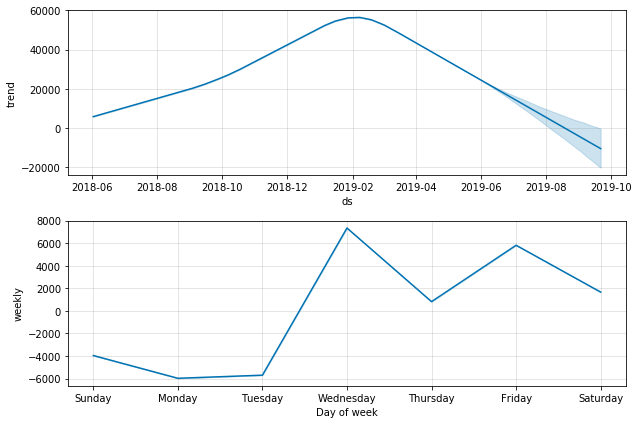

In [92]:
fig2 = m.plot_components(forecast)

> More details about the options available for each method are available in the docstrings, for example, via `help(Prophet)` or `help(Prophet.fit)`.

## Assignment

- Start a new notebook.
- Choose a Wikipedia page to forecast, and get the data.
- Begin with baselines for time series.
- Use the Prophet library to forecast pageviews for the Wikipedia page you chose. 
- Plot your forecast and share it on Slack.
- Commit your notebook to your fork of the GitHub repo.

### Stretch Challenges
- [Get daily weather station data](https://www.ncdc.noaa.gov/cdo-web/search) from the NOAA (National Oceanic and Atmospheric Administration). User Prophet to forecast the weather for your local area. 
- Adjust your forecasts with Prophet's [changepoints](https://facebook.github.io/prophet/docs/trend_changepoints.html) and [holidays](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) options. In addition to Prophet's documentation, read Will Koehrsen's blog post, [Time Series Analysis in Python](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a).
- Learn more about how Prophet works. Read the [tweestorm with animated GIFs](https://twitter.com/seanjtaylor/status/1123278380369973248) by Prophet developer Sean J. Taylor, or his [research paper](https://peerj.com/preprints/3190/).